<h1 style="color: DeepSkyBlue; text-align: center;">ATTRITION CLIENT - TELECOM</h1>


<h5 style="color: DeepSkyBlue; text-align: left;">Prepared By : Ibrahim Kerdi</h5>



## Introduction


#### Le marché des télécommunications est confronté à une concurrence féroce
Le marché des télécommunications connaît une concurrence intense, ce qui rend la prévision de la désertion des clients un élément crucial de la gestion de la relation client (GRC) pour conserver des clients précieux. En conséquence, la recherche des facteurs clés de la désertion des clients est essentielle pour maintenir leur fidélité envers l'opérateur.

#### Objet de Projet
Ce Projet vise à explorer la fidélité et les attentes des clients, en identifiant les raisons qui les poussent à passer d'un opérateur à un autre. " Désertion des clients."



**Features :**
 
 0   State                   
 1   Account length           
 2   Area code               
 3   International plan       
 4   Voice mail plan         
 5   Number vmail messages    
 6   Total day minutes       
 7   Total day calls          
 8   Total day charge        
 9   Total eve minutes       
 10  Total eve calls          
 11  Total eve charge        
 12  Total night minutes     
 13  Total night calls        
 14  Total night charge      
 15  Total intl minutes      
 16  Total intl calls         
 17  Total intl charge       
 18  Customer service calls   
 19  Churn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")



### Lire  Data


In [2]:
df_churn = pd.read_csv('./data/churn-bigml-80.csv')

In [3]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [4]:
df_churn.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
9,RI,74,415,No,No,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False




Les labels churn et non_churn sont-ils équilibrés ?


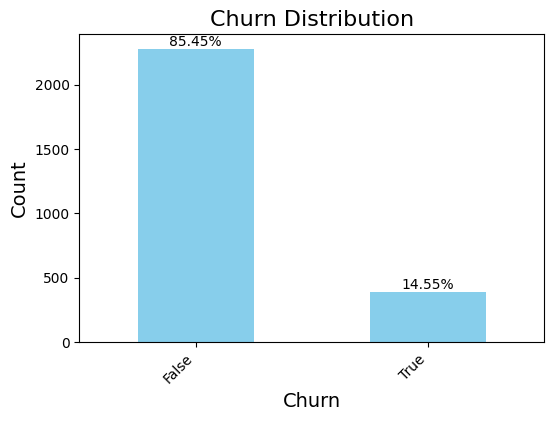

In [5]:
counts = df_churn['Churn'].value_counts()  
percentages = counts / counts.sum() * 100  

counts.plot(kind='bar', figsize=(6, 4), color='skyblue')  
plt.title('Churn Distribution', fontsize=16)  
plt.xlabel('Churn', fontsize=14)  
plt.ylabel('Count', fontsize=14)  
plt.xticks(rotation=45, ha='right')  

for i, (count, percentage) in enumerate(zip(counts, percentages)):  
    plt.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom')  




Les données non balancées peuvent causer plusieurs problèmes:

1. **Biais de modèle** : Les modèles d'apprentissage automatique peuvent être biaisés vers la classe majoritaire, ce qui signifie qu'ils auront tendance à prédire cette classe même lorsque les données appartiennent à la classe minoritaire.
2. **Erreur de classification** : Les données non balancées peuvent entraîner une erreur de classification plus élevée pour la classe minoritaire, car le modèle aura tendance à prédire la classe majoritaire.
3. **Perte de précision** : Les données non balancées peuvent également entraîner une perte de précision dans les prédictions, car le modèle aura du mal à généraliser aux données de la classe minoritaire.
4. **Problèmes de validation** : Les données non balancées peuvent rendre difficile la validation des performances du modèle, car les métriques de validation peuvent être biaisées vers la classe majoritaire.
5. **Difficultés d'interprétation** : Les données non balancées peuvent rendre difficile l'interprétation des résultats du modèle, car les coefficients de poids et les importances des variables peuvent être biaisés vers la classe majoritaire.

Les conséquences de ces problèmes peuvent être graves, notamment :

1. **Décisions erronées** : Les modèles biaisés peuvent entraîner des décisions erronées, ce qui peut avoir des conséquences négatives.
2. **Perte de confiance** : Les modèles biaisés peuvent entraîner une perte de confiance dans les systèmes d'apprentissage automatique, ce qui peut nuire à leur adoption et à leur utilisation.
3. **Inefficacité** : Les modèles biaisés peuvent être inefficaces dans la pratique, ce qui peut entraîner des coûts et des pertes de temps.

Pour éviter ces problèmes, il est important de prendre en compte les données non balancées lors de la conception et de l'entraînement des modèle. Les techniques de rééquilibrage des données, telles que la sur-échantillonnage de la classe minoritaire , la sous-échantillonnage de la classe majoritaire ou SMOTE  peuvent aider à atténuer les problèmes liés aux données non balancées.


**Sous-échantillonnage (Under-sampling)**

* Réduit la taille de la classe majoritaire
* Permet de rééquilibrer les données en réduisant la dominance de la classe majoritaire
* Peut entraîner une perte d'information utile
* Peut être utile lorsque la classe minoritaire est très petite

**Sur-échantillonnage (Over-sampling)**

* Augmente la taille de la classe minoritaire
* Permet de rééquilibrer les données en augmentant la représentation de la classe minoritaire
* Peut entraîner une sur-estimation de la classe minoritaire
* Peut être utile lorsque la classe minoritaire est importante

**SMOTE (Synthetic Minority Over-sampling Technique)- Sur-échantillonnage**

* Crée de nouvelles instances de la classe minoritaire en interpolant entre les instances existantes
* Permet de rééquilibrer les données en augmentant la représentation de la classe minoritaire
* Peut entraîner une sur-estimation de la classe minoritaire si les paramètres ne sont pas bien choisis
* Peut être utile lorsque la classe minoritaire est importante et que les données sont complexes

La choix de la méthode dépend des caractéristiques des données et des objectifs de l'analyse.

par examples:

* Si la classe minoritaire est très petite, le sous-échantillonnage peut être utile.
* Si la classe minoritaire est importante et que les données sont complexes, SMOTE peut être utile.
* Si la classe minoritaire est importante et que les données sont simples, le sur-échantillonnage peut être utile.


In [6]:
df_churn_model = df_churn.copy()

**Prétraitement des données**

1. **State** : Cette colonne peut être convertie en variable catégorielle en utilisant LabelEncoder ou hotencoder.
2. **Account length** : Cette colonne peut être laissée telle quelle, car elle est déjà un entier.
3. **Area code** : Cette colonne peut être laissée telle quelle, car elle est déjà un entier.
4. **International plan** : Cette colonne peut être convertie en variable binaire (0/1) indiquant si le client a un plan international ou non.
5. **Voice mail plan** : Cette colonne peut être convertie en variable binaire (0/1) indiquant si le client a un plan de messagerie vocale ou non.
6. **Number vmail messages** : Cette colonne peut être laissée telle quelle, car elle est déjà un entier.
7. **Total day minutes**, **Total day calls**, **Total day charge**, **Total eve minutes**, **Total eve calls**, **Total eve charge**, **Total night minutes**, **Total night calls**, **Total night charge**, **Total intl minutes**, **Total intl calls**, **Total intl charge** : Ces colonnes peuvent être mises à l'échelle en utilisant StandardScaler ou MinMaxScaler pour avoir des plages similaires.
8. **Customer service calls** : Cette colonne peut être laissée telle quelle, car elle est déjà un entier.
9. **Churn** : Cette colonne est déjà catégorielle, mais vous pouvez la convertir en variable binaire (0/1) indiquant si le client a abandonné ou non.

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
df_churn_model['State'] = le.fit_transform(df_churn_model['State'])
df_churn_model['International plan'] = df_churn_model['International plan'].map({'Yes': 1, 'No': 0})
df_churn_model['Voice mail plan'] = df_churn_model['Voice mail plan'].map({'Yes': 1, 'No': 0})

scaler = StandardScaler()
df_churn_model[['Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge']] = scaler.fit_transform(df_churn_model[['Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge']])

df_churn_model['Churn'] = df_churn_model['Churn'].astype(int)  

In [8]:
df_churn_model.head(100)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,1.579670,0.484868,1.579942,-0.058619,-0.050781,-0.058445,0.857403,-0.469031,0.856707,-0.085020,-0.597527,-0.085681,1,0
1,35,107,415,0,1,26,-0.329918,1.135375,-0.330194,-0.095916,0.147654,-0.095397,1.048458,0.149054,1.049293,1.242179,-0.597527,1.242921,1,0
2,31,137,415,0,0,0,1.179302,0.685024,1.179465,-1.554439,0.494917,-1.554963,-0.759668,0.200561,-0.758391,0.704125,0.216894,0.698194,0,0
3,35,84,408,1,0,0,2.212509,-1.466653,2.212675,-2.718509,-0.596479,-2.718922,-0.084083,-0.572045,-0.084339,-1.304609,1.031314,-1.307995,2,0
4,36,75,415,1,0,0,-0.235822,0.634985,-0.235772,-1.022461,1.090224,-1.021482,-0.281046,1.076181,-0.281303,-0.049150,-0.597527,-0.045823,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,33,74,415,0,0,0,1.900702,0.685024,1.901192,0.383060,-2.580836,0.382658,-0.613915,0.767138,-0.613952,-0.300242,-0.190317,-0.298258,1,1
96,24,112,510,0,1,36,-1.213679,0.835141,-1.213631,-0.841863,-0.894133,-0.841346,-0.464222,0.921659,-0.465135,-0.085020,-0.597527,-0.085681,2,0
97,29,46,408,0,0,0,0.566758,-0.415834,0.566268,0.528324,-1.142178,0.528153,-0.021054,0.818645,-0.023062,1.026957,1.031314,1.030344,1,0
98,43,41,408,0,1,22,0.633178,0.084556,0.633557,-1.150057,-0.695697,-1.150811,-1.161474,1.179195,-1.161071,-1.089387,-0.597527,-1.095419,0,0


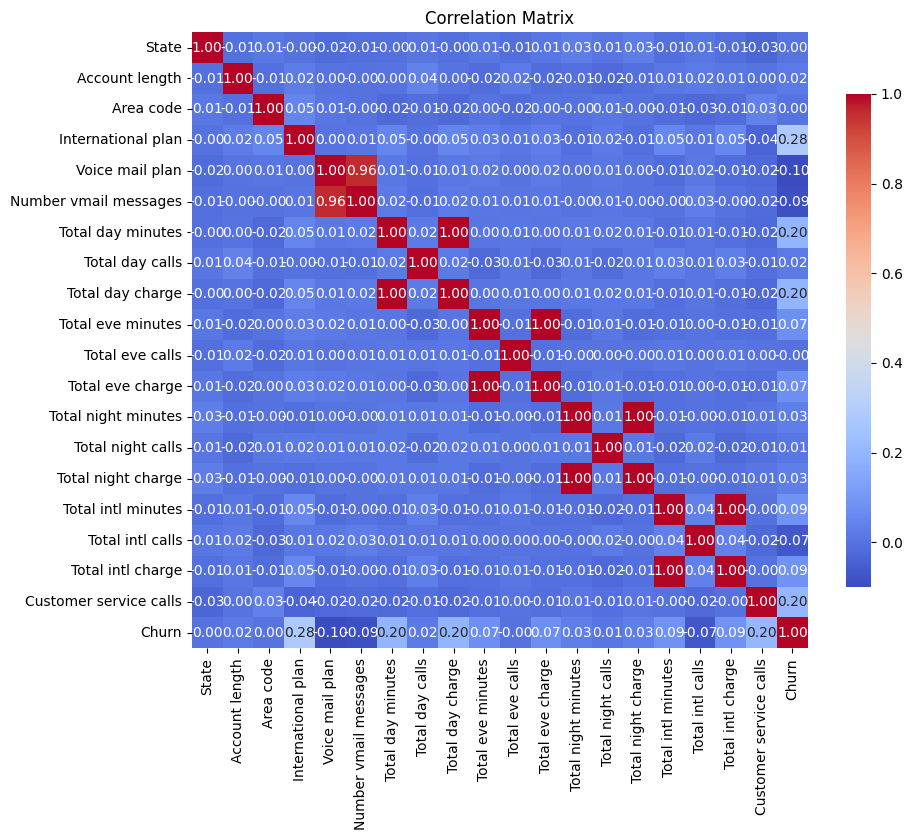

In [9]:
cor_mat = df_churn_model.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor_mat, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

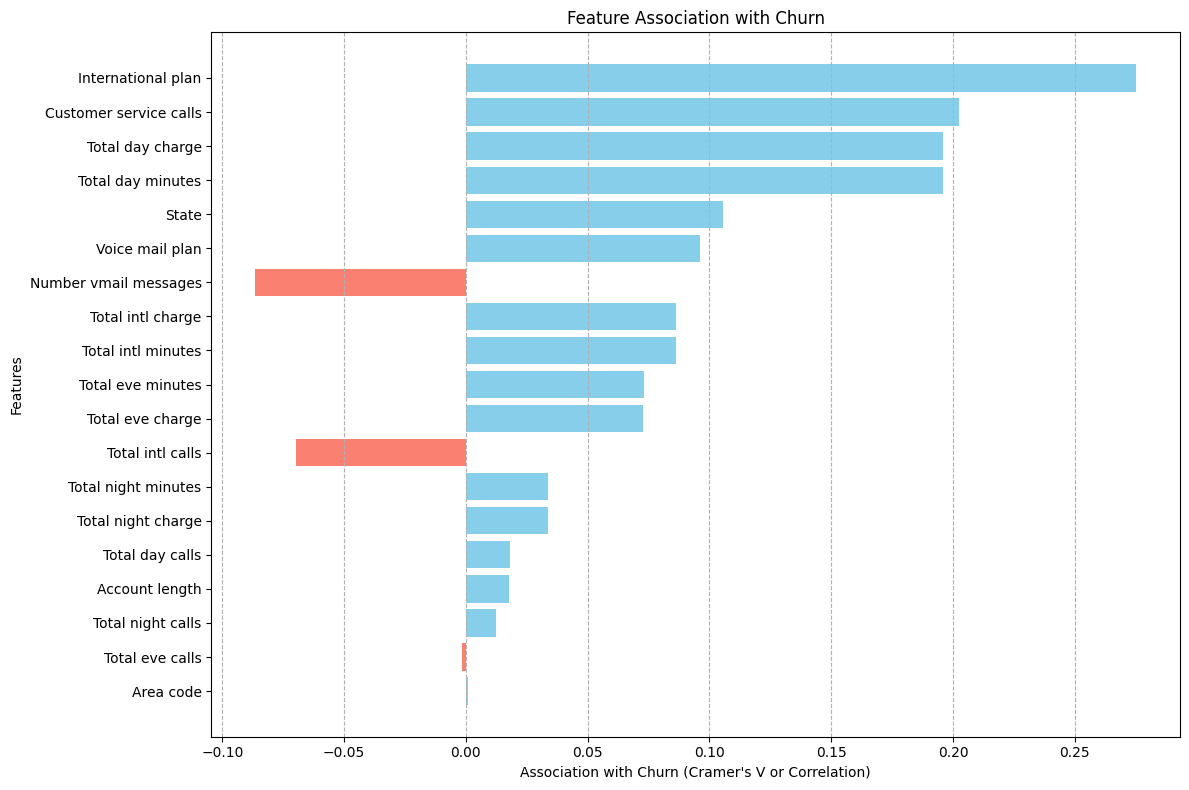

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.stats import chi2_contingency  

  

df_churn['Churn'] = df_churn['Churn'].astype(int) 

 

def cramers_v(x, y):  
    confusion_matrix = pd.crosstab(x, y)  
    chi2 = chi2_contingency(confusion_matrix)[0]  
    n = confusion_matrix.sum().sum()  
    phi2 = chi2 / n  
    r, k = confusion_matrix.shape  
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))  
    rcorr = r - ((r - 1)**2) / (n - 1)  
    kcorr = k - ((k - 1)**2) / (n - 1)  
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))  


churn_associations = []  
for col in df_churn.columns:  
    if col != 'Churn':  # Exclude Churn itself  
        if df_churn[col].dtype.name in ['object','category', 'bool']:  
            association = cramers_v(df_churn[col], df_churn['Churn'])  
        else:  
            association = df_churn[col].corr(df_churn['Churn'])  
        churn_associations.append((col, association))  


churn_associations.sort(key=lambda x: abs(x[1]), reverse=False) 

features, associations = zip(*churn_associations)  

plt.figure(figsize=(12, 8))  
plt.barh(features, associations, color=np.where(np.array(associations) > 0, 'skyblue', 'salmon')) 
plt.xlabel('Association with Churn (Cramer\'s V or Correlation)')  
plt.ylabel('Features')  
plt.title('Feature Association with Churn')  
plt.grid(axis='x', linestyle='--')  
plt.tight_layout()  
plt.show()

In [11]:
# Data Split
X = df_churn_model.drop('Churn', axis=1)
y = df_churn_model['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, stratify=y, random_state=31967)


In [12]:
# Apply SMOTE
smote = SMOTE(random_state=31967)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


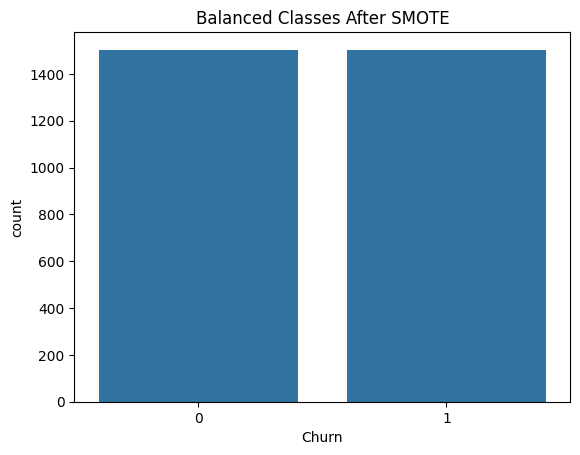

In [13]:
# Check the balance after SMOTE
sns.countplot(x=y_train_res)
plt.title('Balanced Classes After SMOTE')
plt.show()


### Model Specification


In [14]:
import xgboost as xgb 
from sklearn.linear_model import LogisticRegression  
# Model Specification
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=31967)
XGBRF_model = xgb.XGBRFClassifier(max_depth=6,learning_rate=0.1, n_estimators=100,n_jobs=-1, random_state=42 )
Log_model = LogisticRegression()
log_model_unbalenced = LogisticRegression()


**LR (Logistic Regression)**

Un modèle de régression logistique (Logistic Regression) est un type de modèle de prédiction qui est utilisé pour prédire la probabilité d'appartenance à une classe particulière en fonction de variables explicatives. Il est couramment utilisé pour les problèmes de classification binaire, où la variable cible est dichotomique

**XGB (Extreme Gradient Boosting)**

XGB est un algorithme de boosting qui utilise des arbres de décision comme base pour construire un modèle de prédiction. XGB est conçu pour être rapide, efficace et scalable pour les grands ensembles de données. Il utilise une approche de boosting graduée pour combiner les prédictions de plusieurs arbres de décision pour obtenir une prédiction finale.

**XGBRF (Extreme Gradient Boosting avec Random Forest)**

XGBRF est une variante de XGB qui utilise des arbres de décision aléatoires (Random Forest) comme base pour construire le modèle de prédiction. XGBRF combine les avantages de XGB et de Random Forest pour offrir une meilleure robustesse et une meilleure généralisation.

**Différences clés**

1. **Type d'arbre**: XGB utilise des arbres de décision standard, tandis que XGBRF utilise des arbres de décision aléatoires (Random Forest).
2. **Méthode de boosting**: XGB utilise une approche de boosting graduée, tandis que XGBRF utilise une approche de boosting aléatoire.
3. **Robustesse**: XGBRF est plus robuste que XGB en raison de l'utilisation d'arbres de décision aléatoires, qui réduisent le risque de sur-ajustement.
4. **Généralisation**: XGBRF a une meilleure généralisation que XGB en raison de la combinaison de plusieurs arbres de décision aléatoires.
5. **Complexité**: XGBRF est plus complexe que XGB en raison de la nécessité de générer des arbres de décision aléatoires.

**Quand utiliser XGB et XGBRF ?**

1. **XGB**:
 * Avec un grand ensemble de données et que vous avez besoin d'une prédiction rapide et efficace.
 * Avec des données avec des relations linéaires ou non linéaires fortes.
2. **XGBRF**:
 * XGBRF lorsque vous avez des données avec des relations complexes et non linéaires.
 * XGBRF lorsque vous avez besoin d'une meilleure robustesse et d'une meilleure généralisation.

3. **LR**

 * Le modèle de régression logistique est simple à mettre en œuvre et à interpréter.
 * Il est robuste aux données non linéaires et peut gérer des variables explicatives catégorielles.
*  Il peut être utilisé pour prédire la probabilité d'appartenance à une classe particulière.


In [15]:
Log_model.fit(X_train_res, y_train_res)
log_model_unbalenced.fit(X_train,y_train)
y_pred_log = Log_model.predict(X_test)
y_pred_unbalenced = log_model_unbalenced.predict(X_test)

In [16]:
xgb_model.fit(X_train_res, y_train_res)
y_pred = xgb_model.predict(X_test)

In [17]:
import xgboost as xgb  
XGBRF_model.fit(X_train_res, y_train_res)
y_pred_XGBRF = XGBRF_model.predict(X_test)

Rapport de classification (XGB) :
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       775
           1       0.80      0.79      0.79       132

    accuracy                           0.94       907
   macro avg       0.88      0.88      0.88       907
weighted avg       0.94      0.94      0.94       907

Rapport de classification (XGB) :
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       775
           1       0.61      0.78      0.69       132

    accuracy                           0.90       907
   macro avg       0.79      0.85      0.81       907
weighted avg       0.91      0.90      0.90       907



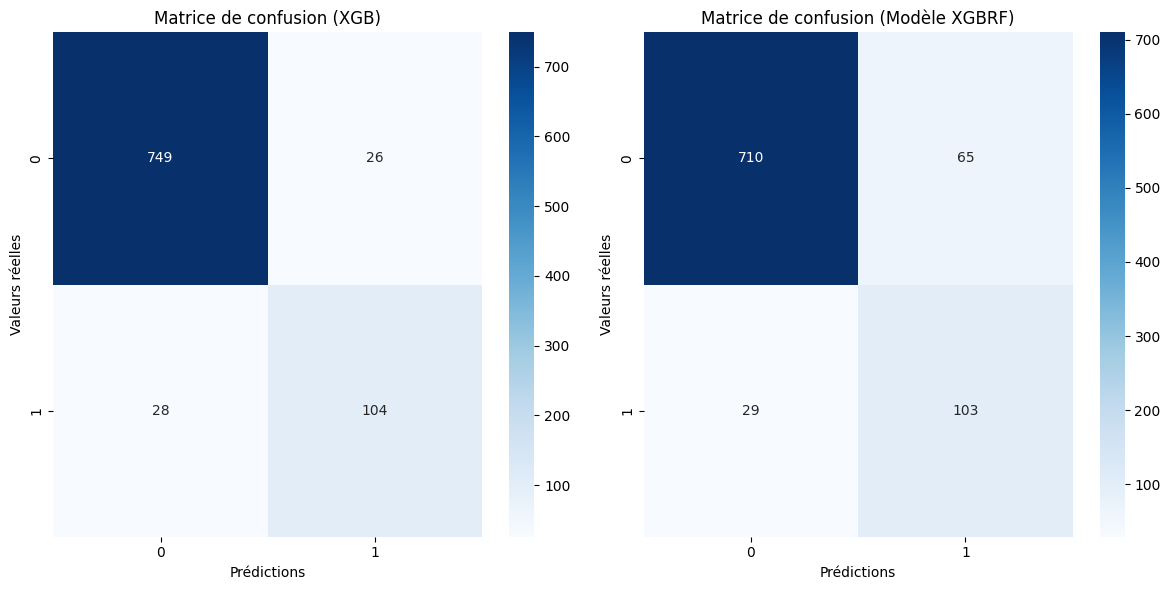

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  
confusion_mat = confusion_matrix(y_test, y_pred)  
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', ax=axs[0])  
axs[0].set_title('Matrice de confusion (XGB)')  
axs[0].set_xlabel('Prédictions')  
axs[0].set_ylabel('Valeurs réelles')  
print("Rapport de classification (XGB) :\n", classification_report(y_test, y_pred))  
  
confusion_mat_xgb = confusion_matrix(y_test, y_pred_XGBRF)  
sns.heatmap(confusion_mat_xgb, annot=True, fmt='d', cmap='Blues', ax=axs[1])  
axs[1].set_title('Matrice de confusion (Modèle XGBRF)')  
axs[1].set_xlabel('Prédictions')  
axs[1].set_ylabel('Valeurs réelles')  
print("Rapport de classification (XGB) :\n", classification_report(y_test, y_pred_XGBRF))
 
plt.tight_layout()  
plt.show()  

Rapport de classification (Logistic Regression with balenced data) :
               precision    recall  f1-score   support

           0       0.94      0.69      0.80       775
           1       0.29      0.75      0.42       132

    accuracy                           0.70       907
   macro avg       0.62      0.72      0.61       907
weighted avg       0.85      0.70      0.74       907
 





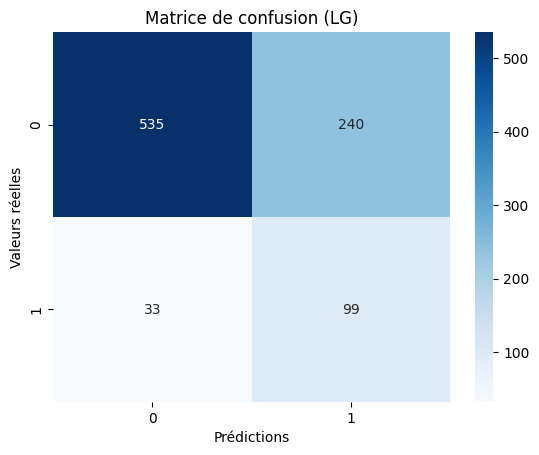

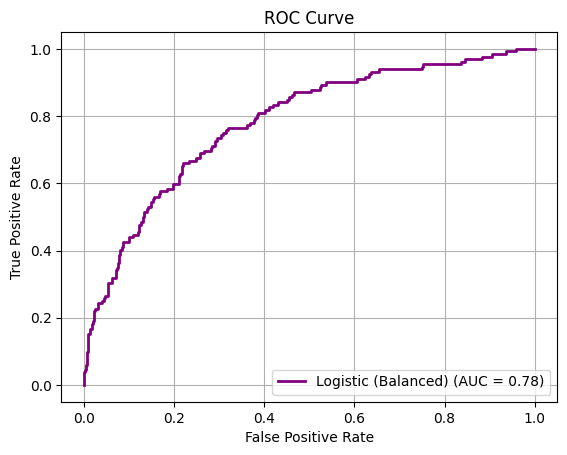


Coefficients des variables Balenced :

State : 0.004594294258475023
Account length : -0.0008683609496888011
Area code : -0.0016324392562482358
International plan : 0.8605532919867024
Voice mail plan : -0.5037086433760084
Number vmail messages : -0.005356834795581162
Total day minutes : 0.32396374322173566
Total day calls : -0.0057729560172285165
Total day charge : 0.3239849001239186
Total eve minutes : 0.1287193575645489
Total eve calls : 0.0686249280989877
Total eve charge : 0.12851446322497673
Total night minutes : 0.041018602957931825
Total night calls : 0.13067194031865867
Total night charge : 0.041140787425320596
Total intl minutes : 0.18482499083633946
Total intl calls : -0.2737311518464214
Total intl charge : 0.18547173980230094
Customer service calls : 0.3677057537232065


In [19]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

print("Rapport de classification (Logistic Regression with balenced data) :\n", classification_report(y_test, y_pred_log),"\n\n\n") 

# confusion_matrix
confusion_mat_log = confusion_matrix(y_test, y_pred_log)  
sns.heatmap(confusion_mat_log, annot=True, fmt='d', cmap='Blues')  
plt.title('Matrice de confusion (LG)')  
plt.xlabel('Prédictions')  
plt.ylabel('Valeurs réelles')  
plt.show() 

print("\n\n\n")

y_pred_proba_log_balanced = Log_model.predict_proba(X_test)[:, 1]  
fpr_log_bal, tpr_log_bal, _ = roc_curve(y_test, y_pred_proba_log_balanced)
roc_auc_log_bal = auc(fpr_log_bal, tpr_log_bal)
plt.plot(fpr_log_bal, tpr_log_bal, color='purple', lw=2, label=f'Logistic (Balanced) (AUC = {roc_auc_log_bal:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print('\nCoefficients des variables Balenced :\n')  
for i, col in enumerate(X_train.columns):  
    print(f'{col} : {Log_model.coef_[0][i]}')

<Figure size 1000x600 with 0 Axes>

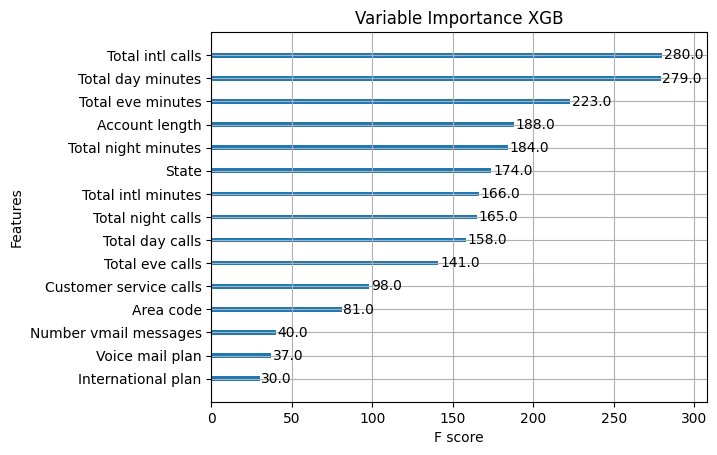

In [20]:

# Variable Importance for tree must be Booster, XGBModel or dict instance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, max_num_features=15, importance_type='weight')
plt.title('Variable Importance XGB')
plt.show()


Rapport de classification (Logistic Regression with unbalenced data) :
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       775
           1       0.49      0.13      0.20       132

    accuracy                           0.85       907
   macro avg       0.68      0.55      0.56       907
weighted avg       0.81      0.85      0.82       907

Rapport de classification (Logistic Regression with balenced data) :
               precision    recall  f1-score   support

           0       0.94      0.69      0.80       775
           1       0.29      0.75      0.42       132

    accuracy                           0.70       907
   macro avg       0.62      0.72      0.61       907
weighted avg       0.85      0.70      0.74       907

Rapport de classification (XGBRF) :
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       775
           1       0.80      0.79      0.79       132

   

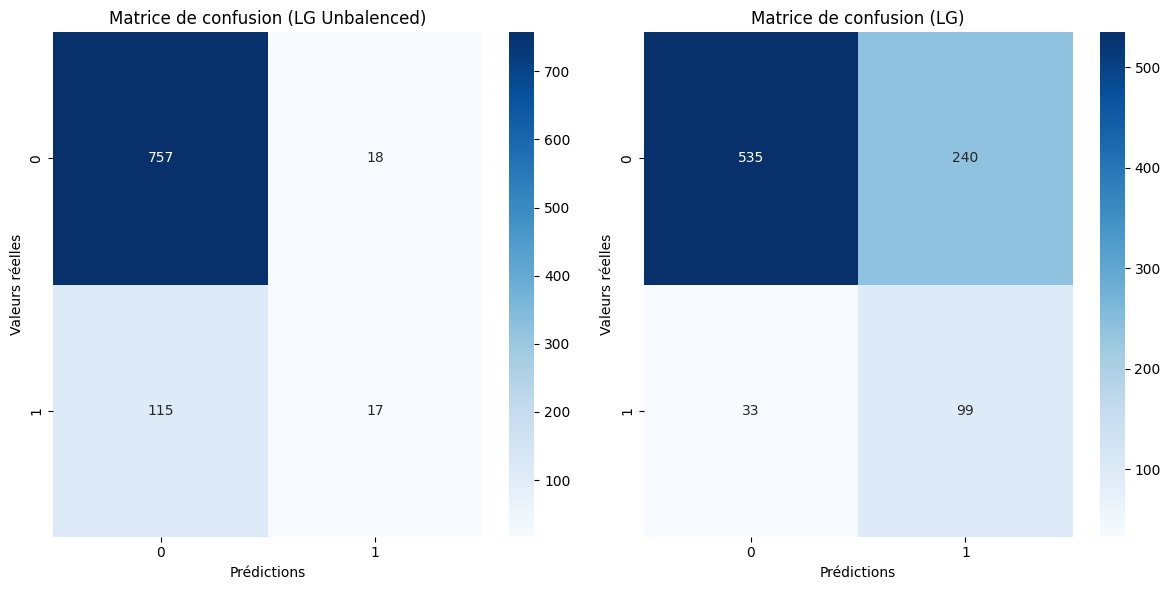

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  
confusion_mat_log_unbalenced = confusion_matrix(y_test, y_pred_unbalenced)  
sns.heatmap(confusion_mat_log_unbalenced, annot=True, fmt='d', cmap='Blues', ax=axs[0])  
axs[0].set_title('Matrice de confusion (LG Unbalenced)')  
axs[0].set_xlabel('Prédictions')  
axs[0].set_ylabel('Valeurs réelles')  
print("Rapport de classification (Logistic Regression with unbalenced data) :\n", classification_report(y_test, y_pred_unbalenced))  
confusion_mat_log = confusion_matrix(y_test, y_pred_log)  
sns.heatmap(confusion_mat_log, annot=True, fmt='d', cmap='Blues', ax=axs[1])  
axs[1].set_title('Matrice de confusion (LG)')  
axs[1].set_xlabel('Prédictions')  
axs[1].set_ylabel('Valeurs réelles')  
print("Rapport de classification (Logistic Regression with balenced data) :\n", classification_report(y_test, y_pred_log)) 
plt.tight_layout()  
plt.show()  

Rapport de classification (XGBRF) :
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       775
           1       0.80      0.79      0.79       132

    accuracy                           0.94       907
   macro avg       0.88      0.88      0.88       907
weighted avg       0.94      0.94      0.94       907

Rapport de classification (XGB) :
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       775
           1       0.61      0.78      0.69       132

    accuracy                           0.90       907
   macro avg       0.79      0.85      0.81       907
weighted avg       0.91      0.90      0.90       907



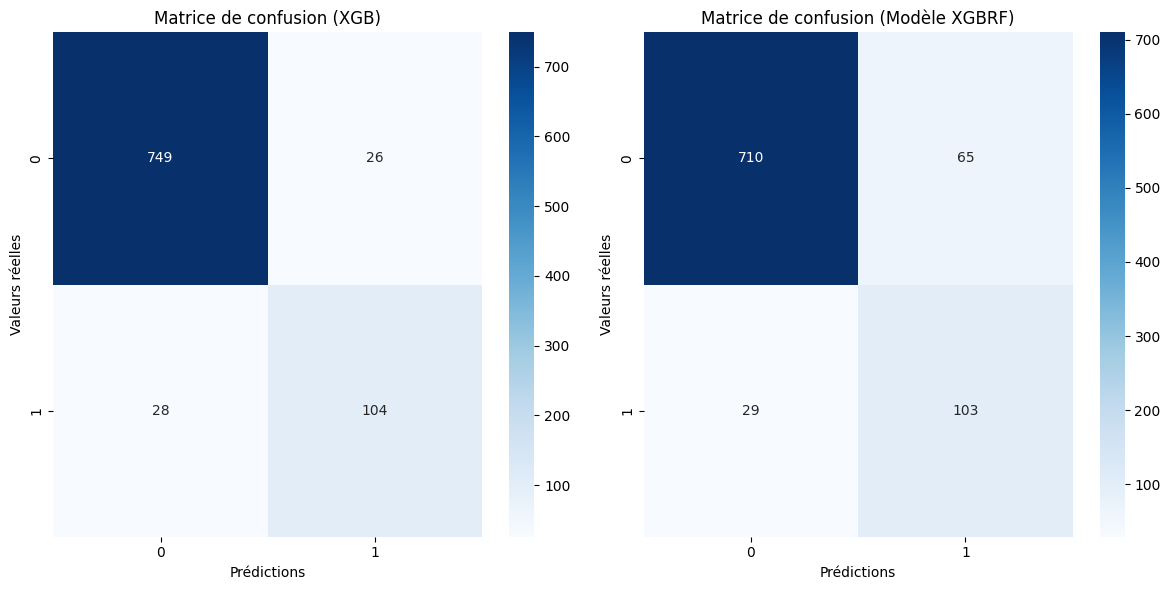

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  
confusion_mat = confusion_matrix(y_test, y_pred)  
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', ax=axs[0])  
axs[0].set_title('Matrice de confusion (XGB)')  
axs[0].set_xlabel('Prédictions')  
axs[0].set_ylabel('Valeurs réelles')  

print("Rapport de classification (XGBRF) :\n", classification_report(y_test, y_pred))  
  
confusion_mat_xgb = confusion_matrix(y_test, y_pred_XGBRF)  
sns.heatmap(confusion_mat_xgb, annot=True, fmt='d', cmap='Blues', ax=axs[1])  
axs[1].set_title('Matrice de confusion (Modèle XGBRF)')  
axs[1].set_xlabel('Prédictions')  
axs[1].set_ylabel('Valeurs réelles')  
print("Rapport de classification (XGB) :\n", classification_report(y_test, y_pred_XGBRF))
plt.tight_layout()  
plt.show()  

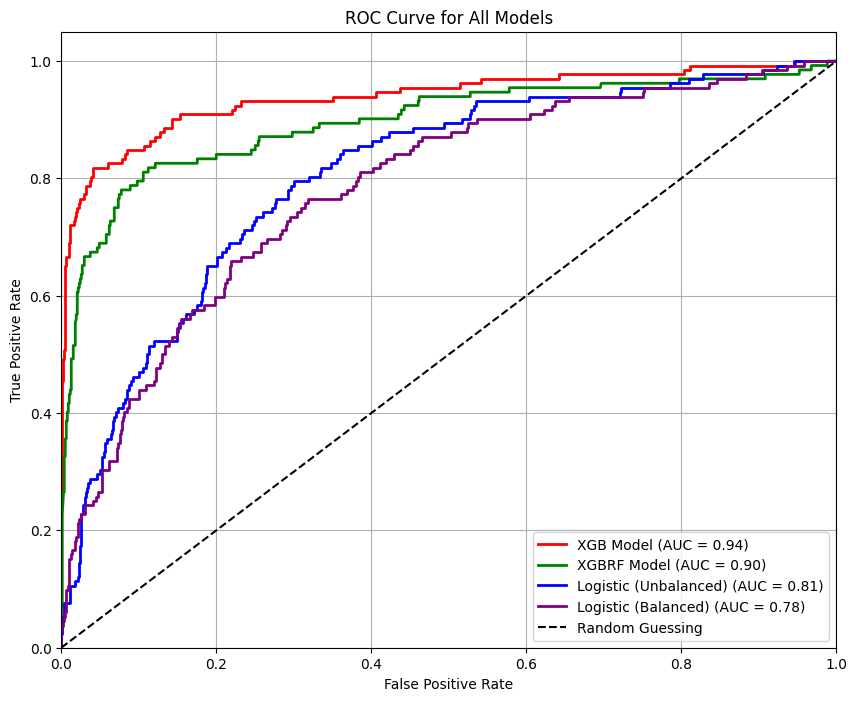

In [23]:

y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_proba_xgbrf = XGBRF_model.predict_proba(X_test)[:, 1]  
y_pred_proba_log_unbalanced = log_model_unbalenced.predict_proba(X_test)[:, 1]  
y_pred_proba_log_balanced = Log_model.predict_proba(X_test)[:, 1]  

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_xgbrf, tpr_xgbrf, _ = roc_curve(y_test, y_pred_proba_xgbrf)
roc_auc_xgbrf = auc(fpr_xgbrf, tpr_xgbrf)

fpr_log_unbal, tpr_log_unbal, _ = roc_curve(y_test, y_pred_proba_log_unbalanced)
roc_auc_log_unbal = auc(fpr_log_unbal, tpr_log_unbal)

fpr_log_bal, tpr_log_bal, _ = roc_curve(y_test, y_pred_proba_log_balanced)
roc_auc_log_bal = auc(fpr_log_bal, tpr_log_bal)


plt.figure(figsize=(10, 8))

plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'XGB Model (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_xgbrf, tpr_xgbrf, color='green', lw=2, label=f'XGBRF Model (AUC = {roc_auc_xgbrf:.2f})')
plt.plot(fpr_log_unbal, tpr_log_unbal, color='blue', lw=2, label=f'Logistic (Unbalanced) (AUC = {roc_auc_log_unbal:.2f})')
plt.plot(fpr_log_bal, tpr_log_bal, color='purple', lw=2, label=f'Logistic (Balanced) (AUC = {roc_auc_log_bal:.2f})')

plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random Guessing')  # Ligne de référence

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc='lower right')
plt.grid()


plt.show()



<Figure size 1000x600 with 0 Axes>

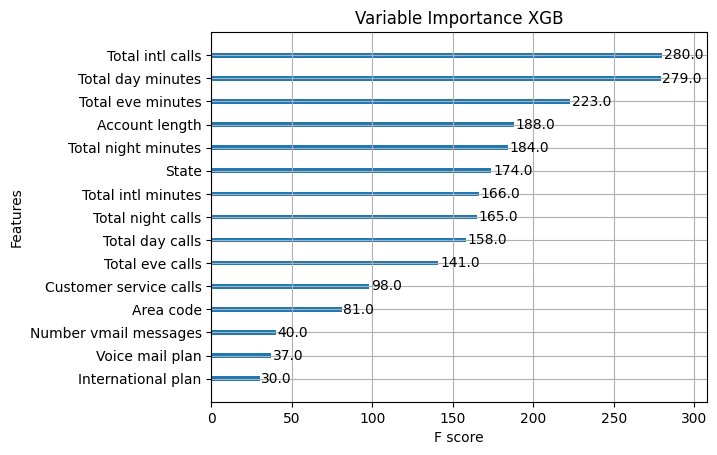

<Figure size 1000x600 with 0 Axes>

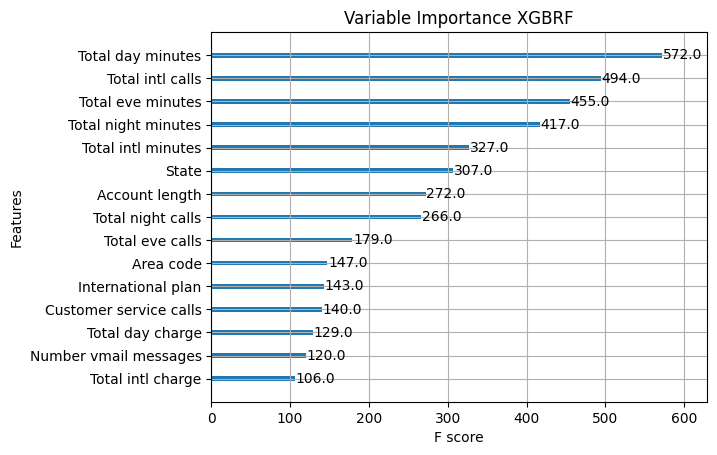

In [24]:
# Variable Importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, max_num_features=15, importance_type='weight')
plt.title('Variable Importance XGB')
plt.show()

plt.figure(figsize=(10, 6))
xgb.plot_importance(XGBRF_model, max_num_features=15, importance_type='weight')
plt.title('Variable Importance XGBRF')
plt.show()

In [25]:
print('Coefficients des variables Unbalenced :\n')  
for i, col in enumerate(X_train.columns):  
    print(f'{col} : {log_model_unbalenced.coef_[0][i]}') 

print('\nCoefficients des variables Balenced :\n')  
for i, col in enumerate(X_train.columns):  
    print(f'{col} : {Log_model.coef_[0][i]}') 

Coefficients des variables Unbalenced :

State : 0.0015615557931810784
Account length : -0.00039136251956524177
Area code : -0.0062484588799334075
International plan : 1.9197857310646778
Voice mail plan : -0.152612015841732
Number vmail messages : -0.02355310887044617
Total day minutes : 0.3345612949708222
Total day calls : -0.020871215570914304
Total day charge : 0.3345397168078966
Total eve minutes : 0.09786286210304371
Total eve calls : 0.013106205258180645
Total eve charge : 0.09751557115243029
Total night minutes : 0.02889327592402898
Total night calls : 0.03691263793635729
Total night charge : 0.02890543001741919
Total intl minutes : 0.1658317968803094
Total intl calls : -0.22712984366302383
Total intl charge : 0.1674766315753099
Customer service calls : 0.4523084453930888

Coefficients des variables Balenced :

State : 0.004594294258475023
Account length : -0.0008683609496888011
Area code : -0.0016324392562482358
International plan : 0.8605532919867024
Voice mail plan : -0.50370

### Description des Résultats

#### 1. **Régression Logistique avec Données Non Équilibrées**
- **Classe 0 (Clients non perdus) :**
  - Précision : 0.87, Rappel : 0.98, F1-Score : 0.92 (bonne spécificité).
- **Classe 1 (Clients perdus) :**
  - Précision : 0.49, Rappel : 0.13, F1-Score : 0.20 (capacité médiocre à identifier les clients perdus).
- **Précision Globale :** 0.85, montrant une bonne exactitude mais avec des limites dans la prédiction de la classe minoritaire (clients perdus).
- **F1-Score Moyen Macro :** 0.55 (réflecteur de la mauvaise performance pour la classe 1).

#### 2. **Régression Logistique avec Données Équilibrées**
- **Classe 0 :**
  - Précision : 0.94, Rappel : 0.69, F1-Score : 0.80.
- **Classe 1 :**
  - Précision : 0.29, Rappel : 0.75, F1-Score : 0.42 (amélioration significative dans l'identification des clients perdus par rapport aux données non équilibrées).
- **Précision Globale :** 0.70, en raison du rééquilibrage mais avec plus de focus sur l'identification des clients perdus.
- **F1-Score Moyen Macro :** 0.61 (meilleur équilibre).

#### 3. **XGBRF (XGBoost avec Random Forest)**
- **Classe 0 :**
  - Précision : 0.96, Rappel : 0.97, F1-Score : 0.97 (excellent pour identifier les clients non perdus).
- **Classe 1 :**
  - Précision : 0.80, Rappel : 0.79, F1-Score : 0.79 (bonne performance dans l'identification des clients perdus).
- **Précision Globale :** 0.94 (la meilleure parmi tous les modèles).
- **F1-Score Moyen Macro :** 0.88, indiquant une performance équilibrée entre les deux classes.

#### 4. **XGB (XGBoost)**
- **Classe 0 :**
  - Précision : 0.96, Rappel : 0.92, F1-Score : 0.94.
- **Classe 1 :**
  - Précision : 0.61, Rappel : 0.78, F1-Score : 0.69.
- **Précision Globale :** 0.90 (légèrement inférieur à XGBRF).
- **F1-Score Moyen Macro :** 0.81, montrant une performance plus faible dans la capture des clients perdus par rapport à XGBRF.

---

### **Recommandation de Modèle**
Pour une tâche d' attrition clients, il est crucial d'identifier les clients perdus (Classe 1) en raison des implications commerciales. Voici les raisons :
- Les modèles de régression logistique ont des difficultés majeures à identifier les clients perdus, même avec des données équilibrées.
- **XGBRF** offre le **meilleur compromis entre précision et F1-scores pour les deux classes**.
  - Il atteint le **meilleur score pour la prédiction des clients perdus (F1-Score Classe 1 : 0.79)**.

#### **Modèle Recommandé :** 
# XGBRF (XGBoost avec Random Forest).

